In [1]:
import pandas as pd
import os
import pandas as pd                     
import matplotlib.pyplot as plt          
import numpy as np 
import scipy.stats as st


In [4]:
#Defining arrivals data
arrivals_df = pd.read_csv (r'output_data\clean_data\tourism_arrivals_clean.csv')
arrivals_df.reset_index(inplace = True, drop = True)
arrivals_df.head ()

,Australia,Norfolk Island,Australian External Territories nec,New Zealand,New Caledonia,Papua New Guinea,Solomon Islands,Vanuatu,Guam,Kiribati,...,Seychelles,Somalia,South Africa,Eswatini,Tanzania,Uganda,Zambia,Zimbabwe,"S & E Afr, nec",Inadequately Described
0,"788,680",0,0,"166,800",0,"3,420",550,470,0,70,...,50,30,"5,730",0,80,50,100,490,0,"2,280"
1,"907,430",0,0,"176,580",0,"3,300",500,570,0,100,...,30,40,"5,850",0,70,70,90,470,0,"3,330"
2,"649,150",0,0,"144,860",0,"3,290",660,640,0,100,...,30,40,"5,810",0,70,60,80,470,0,740
3,"647,520",0,0,"162,290",0,"5,350",750,440,0,80,...,110,20,"11,250",10,90,100,120,810,0,530
4,"1,049,590",0,0,"174,900",0,"4,130",620,560,0,80,...,50,30,"6,700",0,120,110,170,790,0,450


In [6]:
#Defining unemployment data
unemployment_df=pd.read_csv (r'output_data\clean_data\unemployment_clean.csv')
unemployment_df.reset_index(inplace = True, drop = True)
unemployment_df.head ()

,Date,Australia ; Employed total ; Persons ;,Australia ; Employed total ; > Males ;,Australia ; Employed total ; > Females ;,Australia ; > Employed full-time ; Persons ;,Australia ; > Employed full-time ; > Males ;,Australia ; > Employed full-time ; > Females ;,Australia ; > Employed part-time ; Persons ;,Australia ; > Employed part-time ; > Males ;,Australia ; > Employed part-time ; > Females ;,...,> Australian Capital Territory ; Participation rate ; > Males ;,> Australian Capital Territory ; Participation rate ; > Females ;,> Australian Capital Territory ; Not in the labour force (NILF) ; Persons ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Males ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Females ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; Persons ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Males ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Females ;,Month,Year
0,Jul-1991,7583.0,4398.2,3184.8,5900.9,4007.4,1893.5,1682.1,390.8,1291.2,...,81.6,63.9,59.4,19.3,40.0,216.1,105.1,111.0,Jul,1991
1,Aug-1991,7620.7,4398.6,3222.1,5902.2,3993.3,1908.9,1718.5,405.3,1313.2,...,80.4,63.4,61.3,20.6,40.7,216.5,105.3,111.2,Aug,1991
2,Sep-1991,7713.2,4446.1,3267.1,5952.3,4025.2,1927.1,1760.9,420.9,1340.0,...,80.6,64.5,60.0,20.4,39.6,216.9,105.4,111.4,Sep,1991
3,Oct-1991,7638.0,4426.2,3211.7,5955.2,4034.2,1921.0,1682.7,392.0,1290.7,...,79.3,63.2,62.9,21.9,41.0,217.2,105.6,111.6,Oct,1991
4,Nov-1991,7614.9,4408.3,3206.7,5853.8,3980.7,1873.2,1761.1,427.6,1333.5,...,78.9,62.9,63.7,22.3,41.5,217.5,105.7,111.8,Nov,1991


In [8]:
#drop all NaN's 
unemployment_df.dropna

#Creating a lock so we are only looking at the data we are using 
unemployment_clean = unemployment_df.iloc[302:353, 0:2]
unemployment_clean.head()

,Date,Australia ; Employed total ; Persons ;
302,Sep-2016,11944.4
303,Oct-2016,11988.7
304,Nov-2016,12054.0
305,Dec-2016,12149.2
306,Jan-2017,11885.9


In [9]:
#Reset the index 
unemployment_clean = unemployment_clean.reset_index(drop=True)
unemployment_clean.head()

,Date,Australia ; Employed total ; Persons ;
0,Sep-2016,11944.4
1,Oct-2016,11988.7
2,Nov-2016,12054.0
3,Dec-2016,12149.2
4,Jan-2017,11885.9


In [10]:
#Rename the column headings 
unemployment_clean.columns= ['Date', 'Australian Unemployment rate: Persons']
unemployment_clean.head()


,Date,Australian Unemployment rate: Persons
0,Sep-2016,11944.4
1,Oct-2016,11988.7
2,Nov-2016,12054.0
3,Dec-2016,12149.2
4,Jan-2017,11885.9


In [15]:
#Creating a lock so we are only looking at the data we are using
arrivals_df
arrivals_df = arrivals_df.iloc[0:51, 0:2]
arrivals_df.columns= ['Arrivals in Australia', 'Date']
arrivals_df['Date'] = pd.date_range(start='09/2016', periods=len(arrivals_df), freq='M')


arrivals_df.head()

,Arrivals in Australia,Date
0,"788,680",2016-09-30
1,"907,430",2016-10-31
2,"649,150",2016-11-30
3,"647,520",2016-12-31
4,"1,049,590",2017-01-31


In [16]:
#converting data types
arrivals_df["Arrivals in Australia"] = arrivals_df["Arrivals in Australia"].astype('str')
arrivals_df["Arrivals in Australia"] = arrivals_df["Arrivals in Australia"].str.replace(",","").astype(float)
arrivals_df.dtypes

Arrivals in Australia           float64
Date                     datetime64[ns]
dtype: object

In [17]:
#checking data output
arrivals_df.head()

,Arrivals in Australia,Date
0,788680.0,2016-09-30
1,907430.0,2016-10-31
2,649150.0,2016-11-30
3,647520.0,2016-12-31
4,1049590.0,2017-01-31


In [18]:
#merging employment rate and arrivals 
merged_df = pd.merge(unemployment_clean, arrivals_df, left_index=True, right_index=True)
merged_df.head()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
0,Sep-2016,11944.4,788680.0,2016-09-30
1,Oct-2016,11988.7,907430.0,2016-10-31
2,Nov-2016,12054.0,649150.0,2016-11-30
3,Dec-2016,12149.2,647520.0,2016-12-31
4,Jan-2017,11885.9,1049590.0,2017-01-31


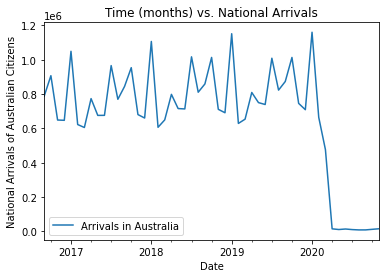

In [19]:
#line graph of national arrivals over time 
graph = arrivals_df.plot(kind = "line", x = "Date", title = "Time (months) vs. National Arrivals")
plt.ylabel("National Arrivals of Australian Citizens")

plt.show()

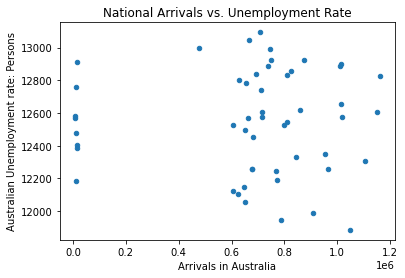

In [20]:
#unemployment rate (y axis) % vs national arrivals of australians (x axis)
graph = merged_df.plot(kind = "scatter", x = "Arrivals in Australia", 
                       y = "Australian Unemployment rate: Persons", title = "National Arrivals vs. Unemployment Rate")

# Saving image
plt.savefig('arrivals_vs_unemployment.png')




The correlation coefficient is: r = -0.0058.
The r squared value is: 0.0.


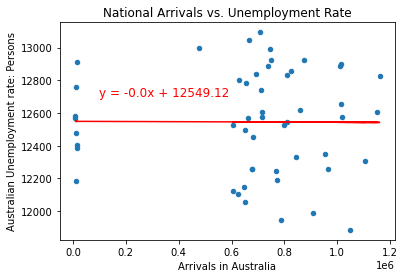

In [36]:
#regression line 
graph = merged_df.plot(kind = "scatter", x = "Arrivals in Australia", 
                       y = "Australian Unemployment rate: Persons", title = "National Arrivals vs. Unemployment Rate")

x_value = merged_df["Arrivals in Australia"]
y_value = merged_df["Australian Unemployment rate: Persons"] 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(100000, 12700), fontsize=12,color="red") 

print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")
print(f"The r squared value is: {round(rvalue**2, 4)}.")

plt.savefig('arrivals_unemployment.png')
plt.show()

In [26]:
#before covid pandemic 
pre_covid_df = merged_df.iloc[0:41, :]
pre_covid_df.tail()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
36,Sep-2019,12925.9,873520.0,2019-09-30
37,Oct-2019,12898.5,1013740.0,2019-10-31
38,Nov-2019,12992.5,746080.0,2019-11-30
39,Dec-2019,13093.2,709350.0,2019-12-31
40,Jan-2020,12827.4,1160610.0,2020-01-31


In [39]:
#reset the index 
pre_covid_df.reset_index(drop=True)
pre_covid_df.head()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
0,Sep-2016,11944.4,788680.0,2016-09-30
1,Oct-2016,11988.7,907430.0,2016-10-31
2,Nov-2016,12054.0,649150.0,2016-11-30
3,Dec-2016,12149.2,647520.0,2016-12-31
4,Jan-2017,11885.9,1049590.0,2017-01-31


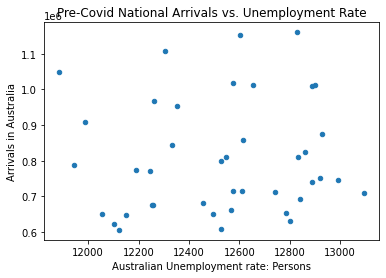

In [40]:
#make a scatter plot 
graph = pre_covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons", 
                       y = "Arrivals in Australia", title = "Pre-Covid National Arrivals vs. Unemployment Rate")

# Saving image
plt.savefig('Pre-Covid_arrival_vs_unemployment.png')

The correlation coefficient is: r = 0.0601.
The r-squared value is: 0.0036.


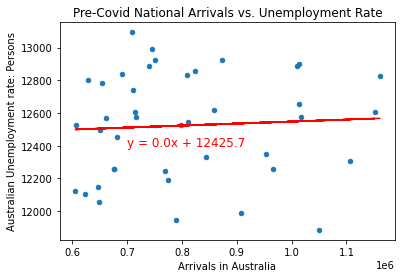

In [41]:
#linear regression 
graph = pre_covid_df.plot(kind = "scatter",
                          x = "Arrivals in Australia",
                          y = "Australian Unemployment rate: Persons",
                          title = "Pre-Covid National Arrivals vs. Unemployment Rate"
                         )

x_value = pre_covid_df["Arrivals in Australia"]
y_value = pre_covid_df["Australian Unemployment rate: Persons"] 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (700000, 12400), fontsize = 12, color = "red") 

print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")
print(f"The r-squared value is: {round(rvalue ** 2, 4)}.")

plt.savefig('pre_covid_arrivals_lin_reg.png')
plt.show()

In [42]:
#after covid was declared pandemic 
covid_df = merged_df.iloc[41:51, :]
covid_df

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
41,Feb-2020,13048.2,664990.0,2020-02-29
42,Mar-2020,12999.4,476430.0,2020-03-31
43,Apr-2020,12407.5,15060.0,2020-04-30
44,May-2020,12186.6,11110.0,2020-05-31
45,Jun-2020,12387.8,14070.0,2020-06-30
46,Jul-2020,12475.2,10700.0,2020-07-31
47,Aug-2020,12572.4,8790.0,2020-08-31
48,Sep-2020,12583.0,8900.0,2020-09-30
49,Oct-2020,12756.9,12280.0,2020-10-31
50,Nov-2020,12909.0,15500.0,2020-11-30


In [43]:
#reset the index 
covid_df.reset_index(drop=True)
covid_df.head()

,Date_x,Australian Unemployment rate: Persons,Arrivals in Australia,Date_y
41,Feb-2020,13048.2,664990.0,2020-02-29
42,Mar-2020,12999.4,476430.0,2020-03-31
43,Apr-2020,12407.5,15060.0,2020-04-30
44,May-2020,12186.6,11110.0,2020-05-31
45,Jun-2020,12387.8,14070.0,2020-06-30


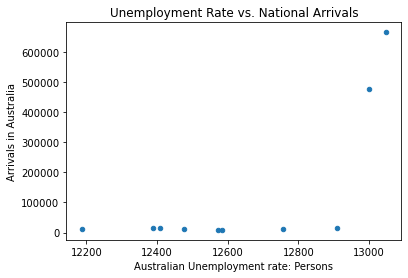

In [46]:
#make the scatter plot
graph = covid_df.plot(kind = "scatter", x = "Australian Unemployment rate: Persons", 
                       y = "Arrivals in Australia", title = "Unemployment Rate vs. National Arrivals")

#save the image
plt.savefig('Covid_arrival_vs_unemployment.png')

The correlation coefficient is: r = 0.7155.
The r-squared value is: 0.512.


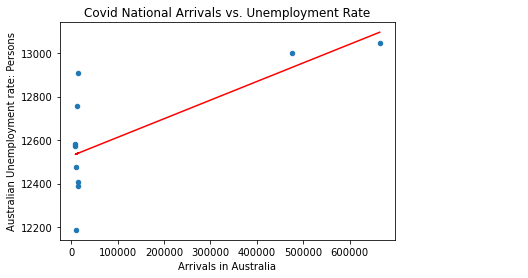

In [48]:
#Regression line 
#linear regression 
graph = covid_df.plot(kind = "scatter",
                          x = "Arrivals in Australia",
                          y = "Australian Unemployment rate: Persons",
                          title = "Covid National Arrivals vs. Unemployment Rate"
                         )

x_value = covid_df["Arrivals in Australia"]
y_value = covid_df["Australian Unemployment rate: Persons"] 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (700000, 12400), fontsize = 12, color = "red") 

print(f"The correlation coefficient is: r = {round(rvalue, 4)}.")
print(f"The r-squared value is: {round(rvalue ** 2, 4)}.")

plt.savefig('covid_arrivals_lin_reg.png')
plt.show()